# Bibineyshvili, et al. 2019 plot code

# Figure 1
## G

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


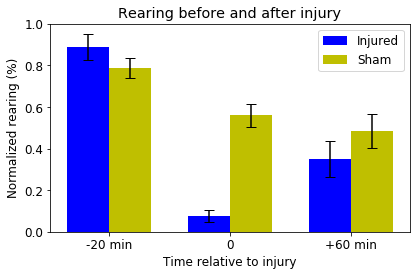

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd

plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 12})
plt.rcParams['savefig.bbox'] = 'tight'


mat = scipy.io.loadmat('normRearing.mat')
nR = mat['nR']
injured = nR[:,(0,2,4)]
sham = nR[:,(1,3,5)]

avg_injured = np.nanmean(injured, axis=0) 
avg_sham = np.nanmean(sham, axis=0)

sem_injured = (np.nanstd(injured, axis=0)/np.sqrt(sum(~np.isnan(injured))))
sem_sham = (np.nanstd(sham, axis=0)/np.sqrt(sum(~np.isnan(sham))))

n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_injured, bar_width, color='b', label='Injured', yerr=sem_injured, capsize=5)

rects2 = plt.bar(index + bar_width, avg_sham, bar_width, color='y', label='Sham', yerr=sem_sham, capsize=5)

plt.xlabel('Time relative to injury')
plt.ylabel('Normalized rearing (%)')
plt.title('Rearing before and after injury')
plt.xticks(index + 0.5*(bar_width), ('-20 min', '0', '+60 min'))
plt.legend()

plt.tight_layout()
plt.show()


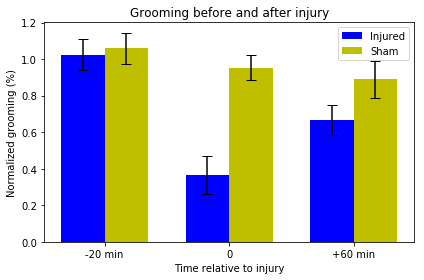

In [2]:
mat = scipy.io.loadmat('normGrooming.mat')
nG = mat['nG']
injured = nG[:,(0,2,4)]
sham = nG[:,(1,3,5)]

avg_injured = np.nanmean(injured, axis=0) 
avg_sham = np.nanmean(sham, axis=0)

sem_injured = (np.nanstd(injured, axis=0)/np.sqrt(sum(~np.isnan(injured))))
sem_sham = (np.nanstd(sham, axis=0)/np.sqrt(sum(~np.isnan(sham))))

n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_injured, bar_width, color='b', label='Injured', yerr=sem_injured, capsize=5)

rects2 = plt.bar(index + bar_width, avg_sham, bar_width, color='y', label='Sham', yerr=sem_sham, capsize=5)

plt.xlabel('Time relative to injury')
plt.ylabel('Normalized grooming (%)')
plt.title('Grooming before and after injury')
plt.xticks(index + 0.5*(bar_width), ('-20 min', '0', '+60 min'))
plt.legend()

plt.tight_layout()
plt.show()

# Figure 2
## F

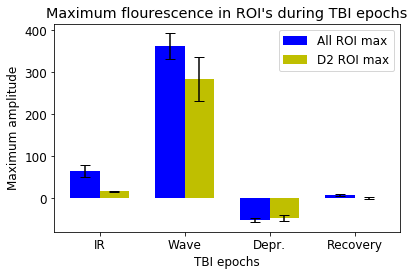

In [15]:
mat = scipy.io.loadmat('fig2_F.mat')
ROI = mat['resultsEvMouse']
Max_ROI = ROI[:,(0,2,4,6)]
D2_ROI = ROI[:,(1,3,5,7)]

avg_Max_ROI = np.nanmean(Max_ROI, axis=0) 
avg_D2_ROI = np.nanmean(D2_ROI, axis=0)

sem_Max_ROI = (np.nanstd(Max_ROI, axis=0)/np.sqrt(sum(~np.isnan(Max_ROI))))
sem_D2_ROI = (np.nanstd(D2_ROI, axis=0)/np.sqrt(sum(~np.isnan(D2_ROI))))

n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_Max_ROI, bar_width, color='b', label='All ROI max', yerr=sem_Max_ROI, capsize=5)

rects2 = plt.bar(index + bar_width, avg_D2_ROI, bar_width, color='y', label='D2 ROI max', yerr=sem_D2_ROI, capsize=5)

plt.xlabel('TBI epochs')
plt.ylabel('Maximum amplitude')
plt.title("Maximum flourescence in ROI's during TBI epochs")
plt.xticks(index + 0.5*(bar_width), ('IR', 'Wave', 'Depr.', 'Recovery'))
plt.legend()

plt.tight_layout()
plt.show()

# Figure 3
## E

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


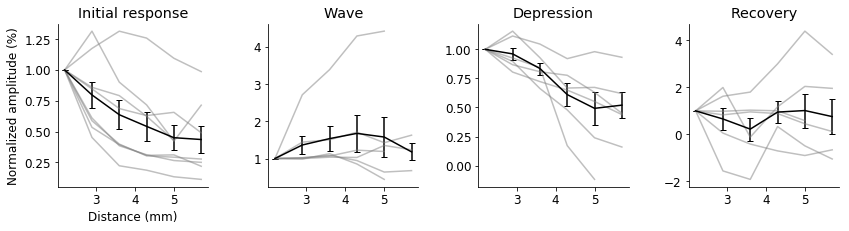

In [16]:
mat = scipy.io.loadmat('fig3_E.mat')

Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance (mm)')

plt.show()

## F

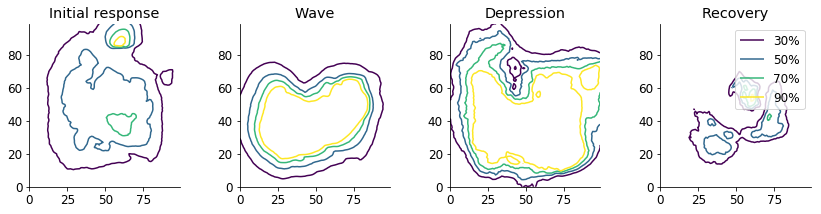

In [90]:
mat = scipy.io.loadmat('fig3_F.mat')

Data = mat['Cont']
Levels = mat['Levels']


# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    if j is not 2:
        cs = ax[j].contour(Data[:,:,j].T, Levels[::-1,j])
    if j is 2:
        ax[j].contour(Data[:,:,j].T, Levels[:,j])
        
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)

labels = ['30%','50%','70%','90%']

for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

plt.legend()
plt.show()



# Figure 4
## E

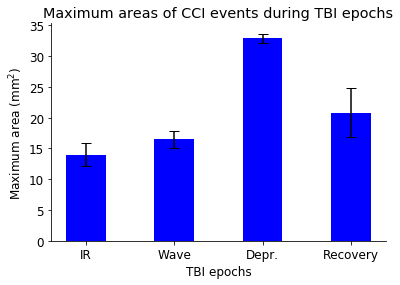

In [99]:
mat = scipy.io.loadmat('fig4_E.mat')
Carea = mat['resultEvMouse']

avg_area = np.nanmean(Carea, axis=0) 

sem_area = (np.nanstd(Carea, axis=0)/np.sqrt(sum(~np.isnan(Carea))))


n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.45

rects1 = plt.bar(index, avg_area, bar_width, color='b', yerr=sem_area, capsize=5)

plt.xlabel('TBI epochs')
plt.ylabel('Maximum area (mm$^2$)')
plt.title("Maximum areas of CCI events during TBI epochs")
plt.xticks(index, ('IR', 'Wave', 'Depr.', 'Recovery'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

# Figure 6
## H

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


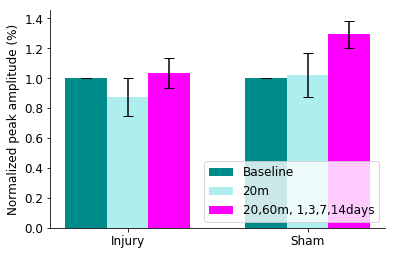

In [40]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injAmp'], mat['shamAmp']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak amplitude (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()


## I

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


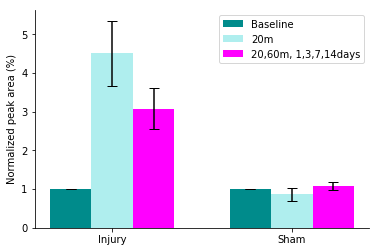

In [35]:
Data = np.dstack((mat['injArea'], mat['shamArea']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak area (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'upper right')
plt.show()

## J

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


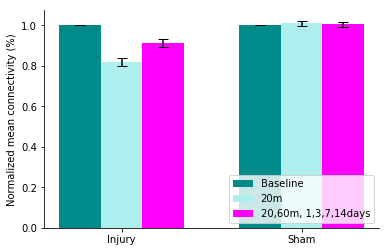

In [38]:
Data = np.dstack((mat['injCon'], mat['shamCon']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized mean connectivity (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()

# Figure 7

In [65]:
Data = pd.read_csv("TBI_Data_2019.csv")
avg_Injured = Data[Data.injured == 1].groupby('Time').mean()
avg_Sham = Data[Data.injured == 0].groupby('Time').mean()
avg_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').mean()
avg_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').mean()

sem_Injured = Data[Data.injured == 1].groupby('Time').sem()
sem_Sham = Data[Data.injured == 0].groupby('Time').sem()
sem_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').sem()
sem_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').sem()
print(Data.keys())
labels = np.array((-7.0, -6.0, -4.0, -0.014, 0.0, 0.014, 0.042, 1.0, 3.0, 7.0, 14.0, 56.0))
x = np.arange(12)


Index(['mouseID', 'Time', 'Gender', 'injured', 'CaAmplit', 'CaArea', 'rearing',
       'grooming', 'NCaAmplit', 'NCaArea', 'Nrearing', 'Ngrooming'],
      dtype='object')


## A

Text(0.5,1,'Grooming tracked over days')

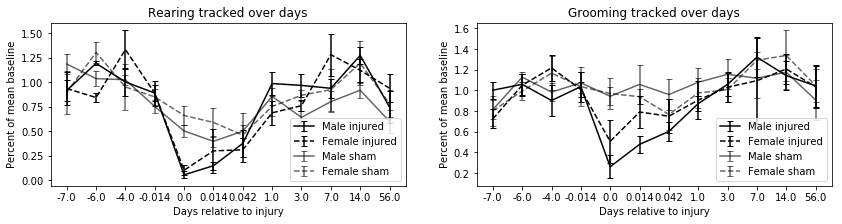

In [51]:
fig,ax = plt.subplots(1,2,figsize=(14,3))
plt.subplot(121)
a = plt.errorbar(x,avg_Injuredm['Nrearing'].values, fmt='k-', yerr=sem_Injuredm['Nrearing'].values, capsize=3)
b = plt.errorbar(x,avg_Injuredf['Nrearing'].values, fmt='k--', yerr=sem_Injuredf['Nrearing'].values, capsize=3)
c = plt.errorbar(x,avg_Shamm['Nrearing'].values, fmt='k-', alpha=0.6, yerr=sem_Shamm['Nrearing'].values, capsize=3)
d = plt.errorbar(x,avg_Shamf['Nrearing'].values, fmt='k--', alpha=0.6, yerr=sem_Shamf['Nrearing'].values, capsize=3)
plt.legend((a,b,c,d), ('Male injured', 'Female injured','Male sham', 'Female sham'), loc = 'lower right')
plt.xticks(x,labels)
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Rearing tracked over days')


plt.subplot(122)
a = plt.errorbar(x,avg_Injuredm['Ngrooming'].values, fmt='k-', yerr=sem_Injuredm['Ngrooming'].values, capsize=3)
b = plt.errorbar(x,avg_Injuredf['Ngrooming'].values, fmt='k--', yerr=sem_Injuredf['Ngrooming'].values, capsize=3)
c = plt.errorbar(x,avg_Shamm['Ngrooming'].values, fmt='k-', alpha=0.6, yerr=sem_Shamm['Ngrooming'].values, capsize=3)
d = plt.errorbar(x,avg_Shamf['Ngrooming'].values, fmt='k--', alpha=0.6, yerr=sem_Shamf['Ngrooming'].values, capsize=3)
plt.legend((a,b,c,d), ('Male injured', 'Female injured','Male sham', 'Female sham'), loc = 'lower right')
plt.xticks(x,labels)
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Grooming tracked over days')


## B

Text(0.5,1,'Fluorescence area tracked over days')

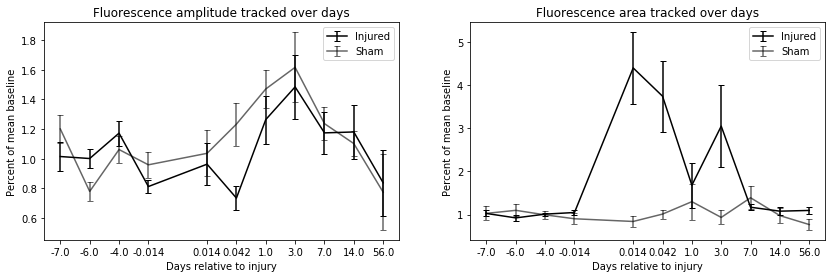

In [69]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
plt.subplot(121)
a = plt.errorbar(x[x != 4],np.delete(avg_Injured['NCaAmplit'].values,4), fmt='k-', yerr=np.delete(sem_Injured['NCaAmplit'].values,4), capsize=3)
c = plt.errorbar(x[x != 4],np.delete(avg_Sham['NCaAmplit'].values,4), fmt='k-', alpha=0.6, yerr=np.delete(sem_Sham['NCaAmplit'].values,4), capsize=3)
plt.legend((a,c), ('Injured','Sham'))
plt.xticks(x[x != 4],labels[labels != 0])
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Fluorescence amplitude tracked over days')


plt.subplot(122)
a = plt.errorbar(x[x != 4],np.delete(avg_Injured['NCaArea'].values,4), fmt='k-', yerr=np.delete(sem_Injured['NCaArea'].values,4), capsize=3)
c = plt.errorbar(x[x != 4],np.delete(avg_Sham['NCaArea'].values,4), fmt='k-', alpha=0.6, yerr=np.delete(sem_Sham['NCaArea'].values,4), capsize=3)
plt.legend((a,c), ('Injured','Sham'))
plt.xticks(x[x != 4],labels[labels != 0])
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Fluorescence area tracked over days')



## C

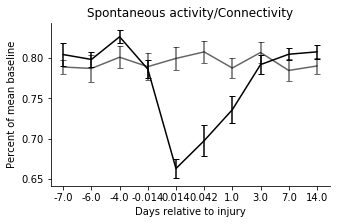

In [86]:
mat = scipy.io.loadmat('fig7_ABC.mat')

Data = mat['conn']

Injured = Data[:,0:13]
Sham = Data[:,14:]

avg_CInj = np.nanmean(Injured, axis=1)
avg_CSha = np.nanmean(Sham, axis=1)

sem_CInj = (np.nanstd(Injured, axis=1)/np.sqrt(np.sum(~np.isnan(Injured), axis=1)))
sem_CSha = (np.nanstd(Sham, axis=1)/np.sqrt(np.sum(~np.isnan(Sham), axis=1)))
labels = np.array((-7.0, -6.0, -4.0, -0.014, 0.014, 0.042, 1.0, 3.0, 7.0, 14.0))
x = np.arange(10)


# create plot
fig, ax = plt.subplots(figsize=(5,3))

ax.errorbar(x, avg_CInj, fmt='k-', yerr=sem_CInj, capsize=3)
ax.errorbar(x, avg_CSha, fmt='k-', alpha=0.6, yerr=sem_CSha, capsize=3)
ax.set_title('Spontaneous activity/Connectivity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x, labels)
ax.set_ylabel('Percent of mean baseline')
ax.set_xlabel('Days relative to injury')

plt.show()

